In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [2]:
# a) 

np.random.seed(42)

alpha = 20 
beta = 0.5

def function(n):
    X = np.random.normal(168, 30, n).reshape(-1, 1)
    epsilon = np.random.normal(0,20, n).reshape(-1, 1)
    Y = alpha + beta * X + epsilon 
    return X, Y 

In [3]:
# b)

sample_sizes = [10**2, 10**3, 10**4, 10**5, 10**6]

for n in sample_sizes:
    X, Y = function(n)
    reg = LinearRegression().fit(X, Y)
    predicted = reg.predict(X)

    print(f"Sample size: {n}")
    print(f"intercept: {reg.intercept_[0]}")
    print(f"slope: {reg.coef_[0][0]}")
    print(f"R-squared: {r2_score(Y, predicted)}")
    print("------------------------")

Sample size: 100
intercept: 36.193358547681
slope: 0.40449522648570446
R-squared: 0.2538302076441885
------------------------
Sample size: 1000
intercept: 24.648334395654047
slope: 0.4762443562989816
R-squared: 0.34378202968466265
------------------------
Sample size: 10000
intercept: 20.59539242266473
slope: 0.49830211943570707
R-squared: 0.3584439265734608
------------------------
Sample size: 100000
intercept: 19.587079972480083
slope: 0.5023573749362942
R-squared: 0.3632475397717875
------------------------
Sample size: 1000000
intercept: 19.984613867307985
slope: 0.5000451738113222
R-squared: 0.3602230072679856
------------------------


#### c) 
As we increase the sample sizes, we can notice that the alpha and beta converges, which is 20 and 0.5 respectively. However, the R-squared value does not converge to 0. Instead, the value converges towards 0.36. The reason why it doesn't reach 1 might be becuase there were some noise, epsilon, added to the function.



#### d)
If the coefficients of the linear regression converge to the true values in the data generating process, then the estimated y would be very similar with true y value except for the noise difference, which means $y - \hat{y} = \epsilon$ 

By using the given information in the question, we can define the numerator part of the R-squared equation as $\sum_{i=1}^{n} \epsilon^{2}$, which equals to $n \times var(\epsilon)$. For the denominator part, it equals to $n \times var(Y)$. Subsituiting both parts $R^{2} = 1 - \frac{n \times var(\epsilon)}{n \times var(Y)}$ which equals to $R^{2} = 1 - \frac{var(\epsilon)}{var(Y)}$. 

As the number of samples grows, the variance of randomness in X will decrease although the noise remains constant which makes the convergence of R-squared to $R^{2} = 1 - \frac{var(\epsilon)}{var(Y)}$. 


#### f)
R-squared represents the proportion of the variance in the target variable predicted based on the independent variables, 1 being the perfect fit. There is no another model that can achieve a better R-squared asymptotically because if the data is using linear regression, it would be hard to catch the random noise. If there is a perfect fit, it is likely that the model would be overfitted and have poor generalization for new coming data sets. Thus, given infinite data, the best way to caputer the linear relationship would be the equation given above, $R^{2} = 1 - \frac{var(\epsilon)}{var(Y)}$. 

#### g)
Through the excercies, we can learn that a model can never prefectly get rid off the random error in the data. Also, it is important for the predictors and target variables to have linearity with some relationship for appopriate predictions. Without linerity, it would be more reasonable to approach modeling with different methods. For better performancing model, it would be crucitial for the data to be independent of each other. 

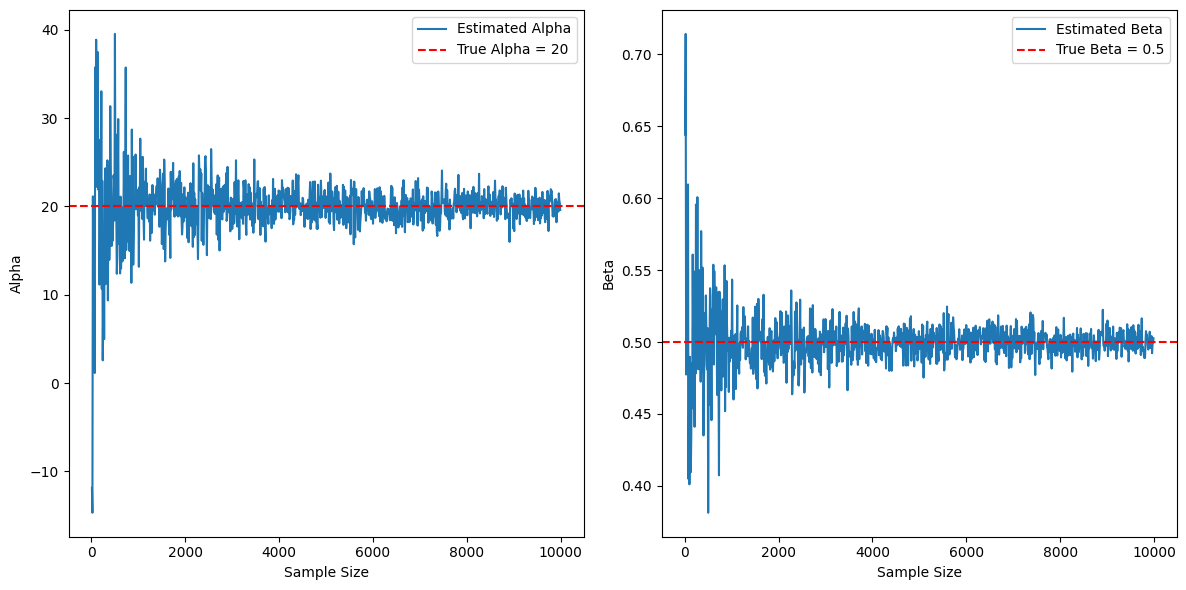

In [4]:
import matplotlib.pyplot as plt
# extra credit
alpha_list = []
beta_list = []

sample_sizes = np.arange(10, 10000, 10)

for n in sample_sizes:
    X, Y = function(n)
    model = LinearRegression().fit(X, Y)

    alpha_list.append(model.intercept_[0])
    beta_list.append(model.coef_[0][0])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(sample_sizes, alpha_list, label='Estimated Alpha')
plt.axhline(y=alpha, color='r', linestyle='--', label=f'True Alpha = {alpha}')
plt.xlabel('Sample Size')
plt.ylabel('Alpha')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, beta_list, label='Estimated Beta')
plt.axhline(y=beta, color='r', linestyle='--', label=f'True Beta = {beta}')
plt.xlabel('Sample Size')
plt.ylabel('Beta')
plt.legend()

plt.tight_layout()
plt.show()

Based on the graph, we can see that both Alpha and Beta is converging to the red line, their initial values, as the sample sizes increase. This shows that the coefficients of the linear regression converges to $\alpha$ and $\beta$ in the data generating process. 